# ORIE 4580/5580/5581 Assignment 4

#### Students: Sikai Shen (ss2725) and Franklin Deng (td268)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline





---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.


In [2]:
p1 = scipy.stats.norm.cdf(0.14/np.sqrt(0.0625))
p2 = scipy.stats.norm.cdf(0.07/np.sqrt(0.01)) 
p3 = scipy.stats.norm.cdf(0.16/np.sqrt(0.09))
print(f"The probability that all three financial products simultaneously yield a positive return: {p1 * p2 * p3:.6f}")

The probability that all three financial products simultaneously yield a positive return: 0.379616


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [3]:
matrix = np.matrix([[0.0625, -0.01, 0.0375],[-0.01, 0.01, -0.015],[0.0375, -0.015, 0.09]])
L = scipy.linalg.cholesky(matrix, lower=True)

count = 0
N = 10000
for _ in range(N):
    X = L @ np.random.normal(size=3)
    if X[0] > -0.14 and X[1] > -0.07 and X[2] > -0.16:
        count += 1
print(f"The probability that all three financial products simultaneously yield a positive return: {count/N}")

The probability that all three financial products simultaneously yield a positive return: 0.3763


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


## Ans.
Since $[\alpha,\beta]$ have mean $0$, we must have $\alpha = -\beta$. Since it's mean $0$, the variance is equal to the expectation of squared variable. 
$\int_{-\beta}^{\beta} \frac{1}{2\beta} x^{2} \, dx = \frac{\beta ^ 2 }{3} =1$
Hence $\alpha = -\sqrt{3}, \beta = \sqrt{3}$

___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.
$\mathbb{E}[V_2] = \mathbb{E}[X_1]\mathbb{P}[B=0] + \mathbb{E}[X_2]\mathbb{P}[B=1] = 0 * (1 - p) + 0 * p = 0$

$\mathbb{E}[V_2 ^ {2}] = \mathbb{E}[X_1 ^ {2}]\mathbb{P}[B=0] + \mathbb{E}[X_2 ^ {2}]\mathbb{P}[B=1] = 1 * (1 - p) + 1 * p = 1$

$Var(V_2) = \mathbb{E}[V_2 ^ {2}] - \mathbb{E}[V_2] ^ {2} = 1$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___



## Ans.
$Cov(V_1, V_2 ) = \mathbb{E}[V_1 V_2] - \mathbb{E}[V_1]\mathbb{E}[V_2] = \mathbb{E}[(1-B)X_1^{2}+BX_1X_2]-0 = \mathbb{E}[(1-B)] \mathbb{E}[X_1^{2}] = (1-p) = \sigma_{12}$

Hence for $p = 1- \sigma_{12}$, we have $Cov(V_1, V_2 )=\sigma_{12}$

___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.
___

## Ans.

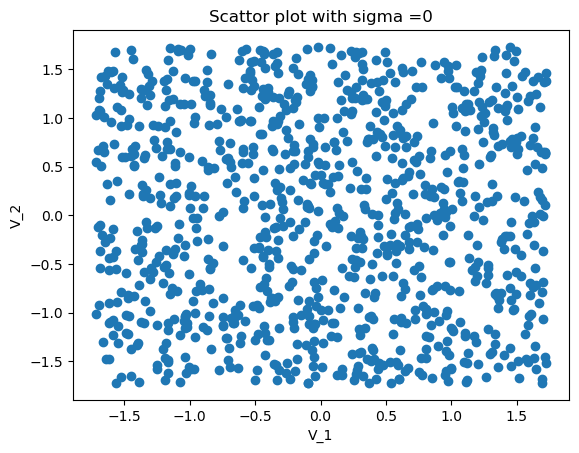

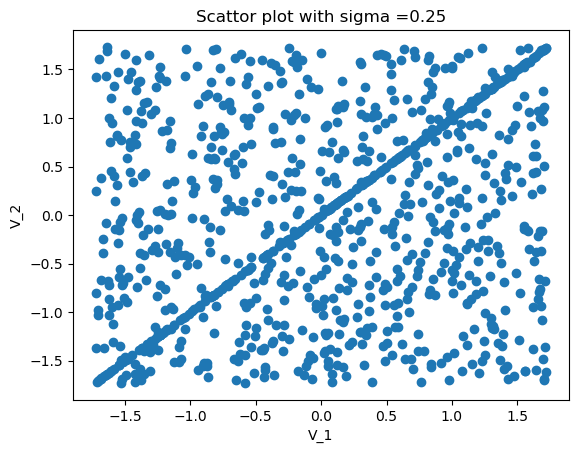

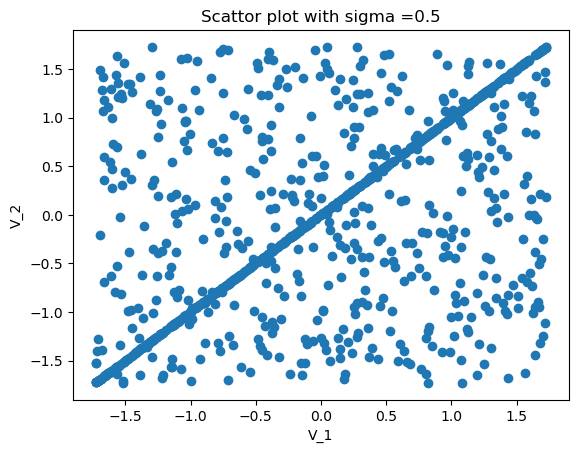

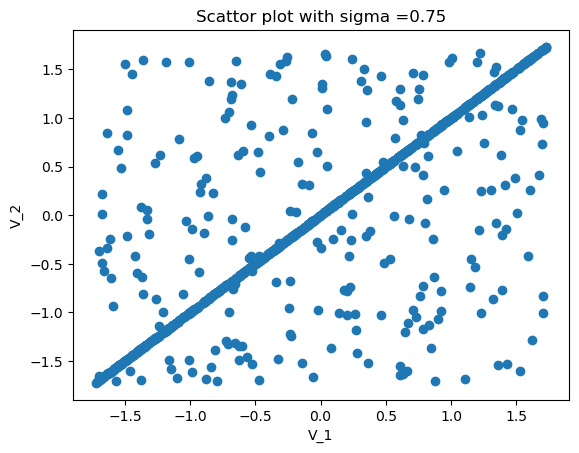

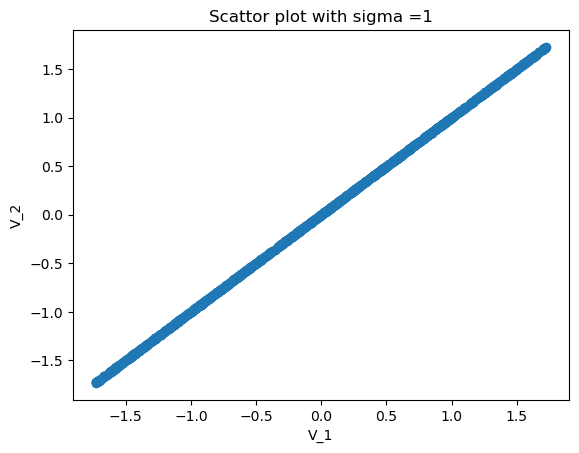

In [4]:
sigma_list = [0, 0.25, 0.5, 0.75, 1]
for sigma in sigma_list:
    V_1 = np.random.uniform(low= - np.sqrt(3), high= np.sqrt(3), size = 1000)
    X_2 = np.random.uniform(low= - np.sqrt(3), high= np.sqrt(3), size = 1000)
    B = np.random.binomial(n = 1, p = 1 - sigma, size = 1000)
    V_2 = (1 - B) * V_1 + B * X_2
    plt.scatter(V_1, V_2)
    plt.xlabel('V_1')
    plt.ylabel('V_2')
    plt.title('Scattor plot with sigma =' + str(sigma))
    plt.show()

___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.
$p = 1 - \sigma_{12} = 0.5$

$\mathbb{P}[V_1\leq 0,V_2\leq 0] = \mathbb{P}[V_1\leq 0,V_2\leq 0 | B = 0]\mathbb{P}[B = 0] + \mathbb{P}[V_1\leq 0,V_2\leq 0|B = 1]\mathbb{P}[B = 1] = \mathbb{P}[X_1\leq 0 | B = 0]\mathbb{P}[B = 0] + \mathbb{P}[X_1\leq 0,X_2\leq 0|B = 1]\mathbb{P}[B = 1] = 0.5 * 0.5 + 0.5 * 0.5 * 0.5 = 0.375$

In [32]:
sigma = 0.5
V_1 = np.random.uniform(low= - np.sqrt(3), high= np.sqrt(3), size = 1000)
X_2 = np.random.uniform(low= - np.sqrt(3), high= np.sqrt(3), size = 1000)
B = np.random.binomial(n = 1, p = 1 - sigma, size = 1000)
V_2 = (1 - B) * V_1 + B * X_2
V = np.array([V_1, V_2])
prob = sum(np.all(V<=0, axis=0)) / 1000
print("The estimated probability is {}".format(prob))

The estimated probability is 0.371


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.

Since $\phi(Z_1)$ denote the 1-d normal cdf, it's also a uniform $U[0,1]$ distribution. Therefore, $(\beta-\alpha)\phi(Z_1)$ follows a $U[0,\beta-\alpha]$ distribution, and by shifting alpha, we get $\alpha + (\beta-\alpha)\phi(Z_1)$ follows $[\alpha,\beta]$. Hence $W_1$ is uniform on $[\alpha,\beta]$. Similarly, since $\phi(Z_2)$ is also $U[0,1]$, $W_2$ is also uniform on $[\alpha,\beta]$.

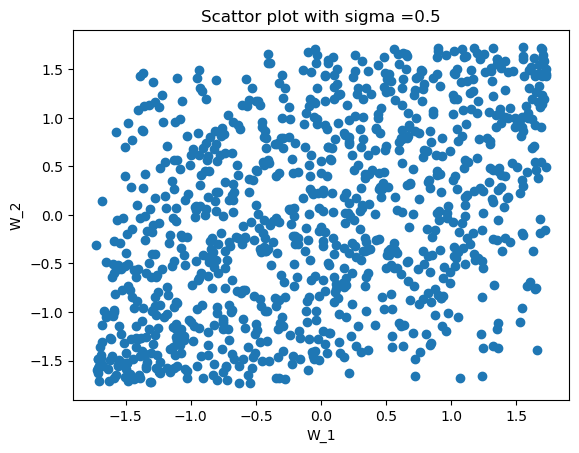

In [42]:
a = -np.sqrt(3)
b = np.sqrt(3)
W = np.zeros((1000,2))
cov = [[1 , 0.5], [0.5, 1]]
for j in range(1000):
    Z = np.random.multivariate_normal(np.zeros(2), cov)
    W[j,:] = a + (b-a) * scipy.stats.norm.cdf(Z)

plt.scatter(W[:,0],W[:,1])
plt.xlabel('W_1')
plt.ylabel('W_2')
plt.title('Scattor plot with sigma =' + str(0.5))
plt.show()

In [43]:
prob = sum(np.all(W<=0, axis=1)) / 1000
print("The estimated probability is {}".format(prob))

The estimated probability is 0.337


___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

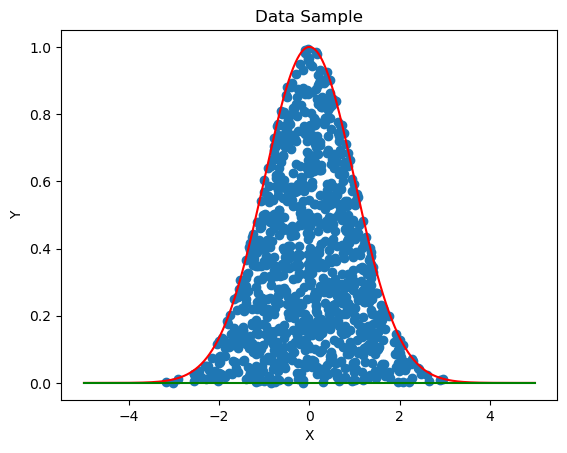

In [6]:
data_x = []
data_y = []
while len(data_x) < 1000:
    x = np.random.normal()
    data_x.append(x)
    upper_bound = np.exp(-x**2 / 2)
    y = np.random.uniform(low=0, high=upper_bound)
    data_y.append(y)
        
X = np.array(data_x)
Y = np.array(data_y)
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Sample')

x = np.linspace(-5, 5, 1000)
zeros = np.zeros(1000)
plt.plot(x, np.exp(- np.square(x)/2), color='red')
plt.plot(x, zeros, color='green')


plt.show()

___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

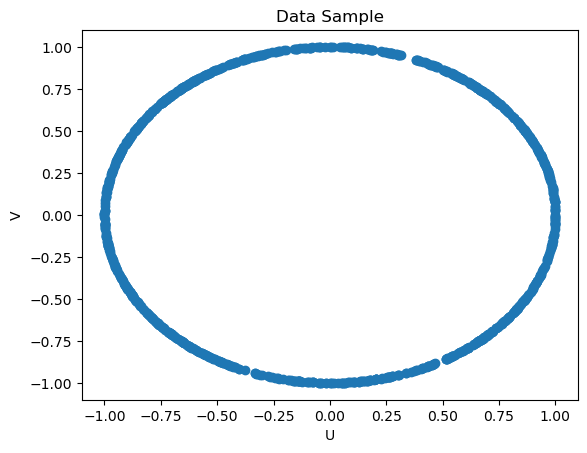

In [7]:
U = np.random.uniform(low=-1, high=1, size=1000)
V = np.random.uniform(low=-1, high=1, size=1000)
U_normalized = U / (np.sqrt(np.square(U) + np.square(V)))
V_normalized = V / (np.sqrt(np.square(U) + np.square(V)))
theta = np.arctan(U/V)

plt.scatter(U_normalized, V_normalized)
plt.xlabel('U')
plt.ylabel('V')
plt.title('Data Sample')
plt.show()

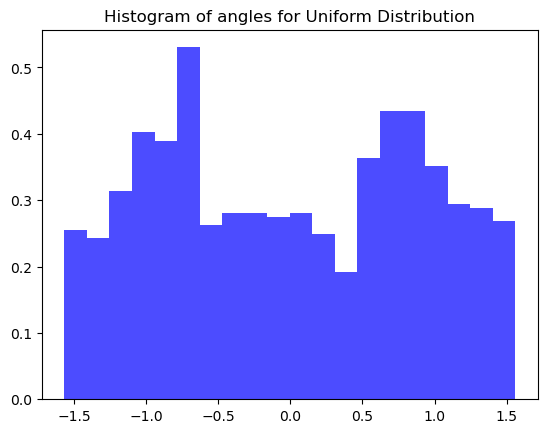

In [8]:
plt.hist(theta, bins=20, color='blue', alpha=0.7, density=True)
plt.title('Histogram of angles for Uniform Distribution')
plt.show()



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

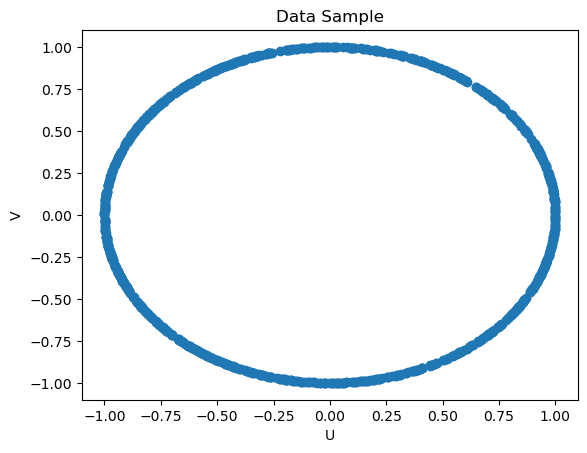

In [9]:
U = np.random.normal(size=1000)
V = np.random.normal(size=1000)
U_normalized = U / (np.sqrt(np.square(U) + np.square(V)))
V_normalized = V / (np.sqrt(np.square(U) + np.square(V)))
theta = np.arctan(U/V)

plt.scatter(U_normalized, V_normalized)
plt.xlabel('U')
plt.ylabel('V')
plt.title('Data Sample')
plt.show()

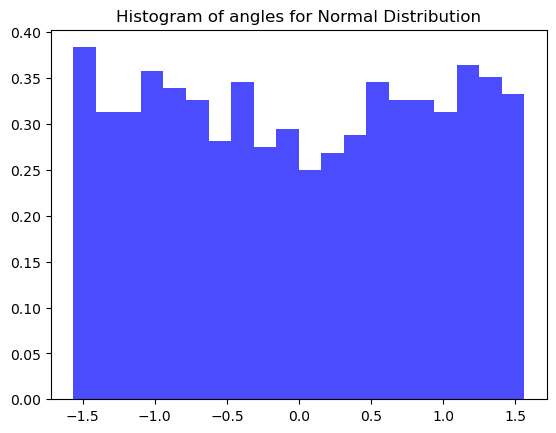

In [10]:
plt.hist(theta, bins=20, color='blue', alpha=0.7, density=True)
plt.title('Histogram of angles for Normal Distribution')
plt.show()

The main difference is the support or the domain of sample. For part(b), the support is a square, which is not rotational symmetric. For part(c), the domain is whole 2d space, and the probabilty density happens to be rotational symmetric around the center.

___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [11]:
T = np.random.uniform(low=0, high=1000, size=10000)
arrived_time = (T // 10 + 1) * 10
waiting_time = arrived_time - T

mean_samples = np.mean(waiting_time)
std_samples = np.std(waiting_time)
ci_low, ci_high = mean_samples - scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(10000), mean_samples + scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(10000)
print(f"Expected time: {mean_samples:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")

Expected time: 5.02
95% CI: (4.96, 5.07)


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [12]:
T = np.random.uniform(low=0, high=1000, size=10000)
T = np.sort(T)
waiting_time = []
left_pointer = 0
bus_cumsum = 0
bus_count = 0
while left_pointer < 10000:
    while bus_cumsum < T[left_pointer]:
        bus_cumsum += np.random.exponential(scale=10.0, size=1)[0]
        bus_count += 1
    waiting_time.append(bus_cumsum - T[left_pointer])
    left_pointer += 1
    
waiting_time = np.array(waiting_time)
mean_samples = np.mean(waiting_time)
std_samples = np.std(waiting_time)
ci_low, ci_high = mean_samples - scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(10000), mean_samples + scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(10000)
print(f"Expected time: {mean_samples:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")

Expected time: 10.22
95% CI: (10.05, 10.39)


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [14]:
arrival_time = np.random.exponential(scale=10.0, size=bus_count)
mean_samples = np.mean(arrival_time)
std_samples = np.std(arrival_time)
ci_low, ci_high = mean_samples - scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(bus_count), mean_samples + scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(bus_count)
print(f"Expected time: {mean_samples:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")

Expected time: 10.29
95% CI: (8.37, 12.22)


___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

The inter-arrival time for (a) is fixed 10. This can be clarified by considering that passenger arrival times follow a uniform distribution, meaning they have an equal likelihood of falling within any of the 10-minute intervals. Moreover, within each interval, the waiting time is symmetric, which implies that the mean waiting time should be half of the interval duration.

In [26]:
T = np.random.uniform(low=0, high=1000, size=10000)
T = np.sort(T)
sample_inter_time = np.zeros(10000)
arrival_cumsum = arrival_time.cumsum()
i = 1
l = 0
while i < bus_count:
    if(l < 10000 and T[l] <= arrival_cumsum[i]):
        sample_inter_time[l] = arrival_cumsum[i] - arrival_cumsum[i-1]
        l += 1
    else:
        i += 1

mean_samples = np.mean(sample_inter_time)
std_samples = np.std(sample_inter_time)
ci_low, ci_high = mean_samples - scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(10000), mean_samples + scipy.stats.norm.ppf(0.975) * std_samples/np.sqrt(10000)
print(f"Expected time: {mean_samples:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")

Expected time: 19.56
95% CI: (19.32, 19.81)


The inter-arrival time for (b) is (19.32, 19.81). The extra waiting time is not influenced by prior waiting times. This suggests that, on average, a passenger's wait time should align with the mean of an exponential distribution, which is 10. This differs from part a, as when there's a greater disparity between train arrival times, it's more probable that more passengers will fall within that interval, resulting in a larger inter-interval mean.


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  